<a href="https://colab.research.google.com/github/anggaagustiratelkom/Visi_Komputer_FaceDetection/blob/main/Tugas_UTS_Visi_Komputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download File haarcascade untuk melihat bentuk dari suatu persegi dimana didalamnya akan mendeteksi perbedaan warna untuk menentukannya dengan mengubah terlebih dahulu ke 2 warna yaitu hitam dan putih agar warna tidak terlalu banyak dan proses menjadi ringan**

In [ ]:
!wget --no-check-certificate \https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \-O haarcascade_frontalface_default.xml #fungsinya yaitu untuk mendownload file haarcascade keseluruhan muka pada github
!wget --no-check-certificate \https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \-O haarcascade_mouth.xml #fungsinya yaitu untuk mendownload file haarcascade mulut pada github
!wget --no-check-certificate \https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \-O haarcascade_eye.xml #fungsinya yaitu untuk mendownload file haarcascade mata kiri dan kanan pada github
# !wget --no-check-certificate \https://raw.githubusercontent.com/peterbraden/node-opencv/master/data/haarcascade_mcs_nose.xml \-O haarcascade_mcs_nose.xml #fungsinya yaitu untuk mendownload file haarcascade hidung pada github

--2020-11-10 18:15:33--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.09s   

2020-11-10 18:15:34 (9.48 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2020-11-10 18:15:34--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)

**Import Package opencv dan akses google drive**

In [ ]:
import cv2 #menambahkan fitur open cv2
import matplotlib.pyplot as plt #menambahkan fitur pyplot untuk menampilkan gambar
import numpy as np # memanipulasi nilai matrix pada gambar
import pylab # Menambahkan fitur ukuran gambar
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # Menentukan ukuran gambar
from google.colab import drive #Menambahkan fitur untuk akses google drive 
drive.mount('/content/drive') #Menentukan konten drive yang digunakan dengan memsaukkan kode untuk mengakses google drive
!ls "drive/My Drive/Colab Notebooks/Visi Komputer/tugasuts/face man.jpg" #

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'drive/My Drive/Colab Notebooks/Visi Komputer/tugasuts/face man.jpg'


**Mendeteksi Keseluruhan Wajah**

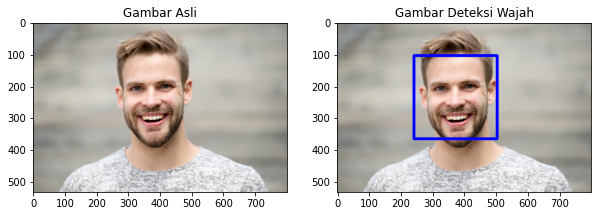

In [ ]:
gambar_asli = cv2.imread('/content/drive/My Drive/Colab Notebooks/Visi Komputer/tugasuts/face man.jpg') #Pengambilan suatu data gambar pada google drive
gambar_test = cv2.imread('/content/drive/My Drive/Colab Notebooks/Visi Komputer/tugasuts/face man.jpg') #Pengambilan suatu data gambar pada google drive
grey = cv2.cvtColor(gambar_test, cv2.COLOR_BGR2GRAY) #Mengubah warna gambar yang akan di deteksi menjadi grayscale atau hitam putih 
wajah_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #Penggunaan haar cascade untuk klasifikasi wajah yang akan ditangkap
wajah = wajah_cascade.detectMultiScale(grey, 1.3, 5) #Pengubahan warna ke grayscale
for (x,y,w,h) in wajah: #Perulangan untuk perhitungan suatu gambar
     cv2.rectangle(gambar_test,(x,y),(x+w,y+h),(255,0,0),7) #Perhitungan gambar dengan menentukan warna yang cocok untuk wajah dengan mengecek disertiap pixelnya penebalan square pada wajah
plt.subplot(121),plt.imshow(cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB)) #Menentukan gambar aslinya
plt.title('Gambar Asli') #Judul gambar
plt.subplot(122),plt.imshow(cv2.cvtColor(gambar_test, cv2.COLOR_BGR2RGB)) #Menentukan gambar test sesudah dideteksi 
plt.title('Gambar Deteksi Wajah') #Judul gambar
plt.show() #Menampilkan keseluruhan gambar

**Mendeteksi Mata Kiri dan Mata Kanan pada Wajah**

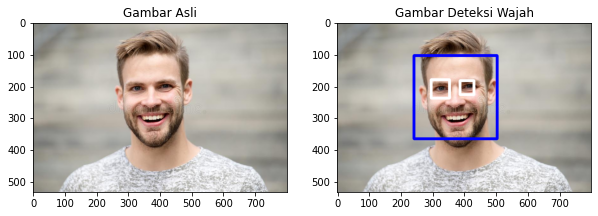

In [ ]:
gambar_asli = cv2.imread('/content/drive/My Drive/Colab Notebooks/Visi Komputer/tugasuts/face man.jpg') #Pengambilan suatu data gambar pada google drive
gambar_test = cv2.imread('/content/drive/My Drive/Colab Notebooks/Visi Komputer/tugasuts/face man.jpg') #Pengambilan suatu data gambar pada google drive
for (x,y,w,h) in wajah: #Perulangan untuk perhitungan suatu gambar
  cv2.rectangle(gambar_test,(x,y),(x+w,y+h),(255,0,0),7) #Perhitungan gambar dengan menentukan warna yang cocok untuk wajah dengan mengecek disertiap pixelnya penebalan square pada wajah
  mata_cascade = cv2.CascadeClassifier('haarcascade_eye.xml') #Penggunaan haar cascade untuk klasifikasi wajah yang akan ditangkap
  mata = mata_cascade.detectMultiScale(grey, 1.3, 1) #Pengubahan warna ke grayscale
  for (x_s,y_s,w_s,h_s) in mata: #Perulangan untuk perhitungan suatu gambar
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)): #Kondisi posisi mata kiri dan kanan pada setiap pixel gambar
      cv2.rectangle(gambar_test, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),7) #Perhitungan gambar dengan menentukan warna yang cocok untuk mata dengan mengecek disetiap pixelnya penebalan square pada mata
plt.subplot(121),plt.imshow(cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB)) #Menentukan gambar aslinya
plt.title('Gambar Asli') #Judul gambar
plt.subplot(122),plt.imshow(cv2.cvtColor(gambar_test, cv2.COLOR_BGR2RGB)) #Menentukan gambar test sesudah dideteksi 
plt.title('Gambar Deteksi Wajah') #Judul gambar
plt.show() #Menampilkan keseluruhan gambar

**Mendeteksi Mulut pada Wajah**

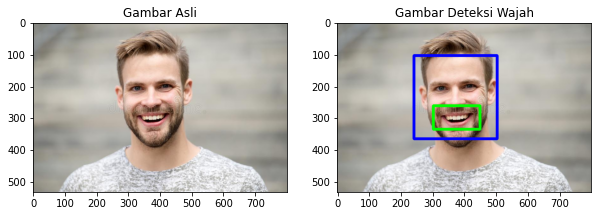

In [ ]:
gambar_asli = cv2.imread('/content/drive/My Drive/Colab Notebooks/Visi Komputer/tugasuts/face man.jpg') #Pengambilan suatu data gambar pada google drive
gambar_test = cv2.imread('/content/drive/My Drive/Colab Notebooks/Visi Komputer/tugasuts/face man.jpg') #Pengambilan suatu data gambar pada google drive
for (x,y,w,h) in faces: #Perulangan untuk perhitungan suatu gambar
  cv2.rectangle(gambar_test,(x,y),(x+w,y+h),(255,0,0),7) #Perhitungan gambar dengan menentukan warna yang cocok untuk wajah dengan mengecek disertiap pixelnya penebalan square pada wajah
  mulut_cascade = cv2.CascadeClassifier('haarcascade_mouth.xml') #Penggunaan haar cascade untuk klasifikasi wajah yang akan ditangkap
  mulut = mulut_cascade.detectMultiScale(grey, 1.3, 20) #Pengubahan warna ke grayscale
  for (x_s,y_s,w_s,h_s) in mulut: #Perulangan untuk perhitungan suatu gambar
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)): #Kondisi posisi mulut pada setiap pixel gambar
      cv2.rectangle(gambar_test, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),7) #Perhitungan gambar dengan menentukan warna yang cocok untuk mulut dengan mengecek disetiap pixelnya penebalan square pada mulut
plt.subplot(121),plt.imshow(cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB)) #Menentukan gambar aslinya
plt.title('Gambar Asli') #Judul gambar
plt.subplot(122),plt.imshow(cv2.cvtColor(gambar_test, cv2.COLOR_BGR2RGB)) #Menentukan gambar test sesudah dideteksi 
plt.title('Gambar Deteksi Wajah') #Judul gambar
plt.show() #Menampilkan keseluruhan gambar

**Mendeteksi Mata Kiri dan Mata Kanan, Mulut pada Wajah**

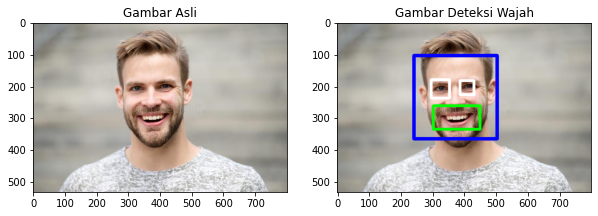

In [ ]:
gambar_asli = cv2.imread('/content/drive/My Drive/Colab Notebooks/Visi Komputer/tugasuts/face man.jpg') #Pengambilan suatu data gambar pada google drive
gambar_test = cv2.imread('/content/drive/My Drive/Colab Notebooks/Visi Komputer/tugasuts/face man.jpg') #Pengambilan suatu data gambar pada google drive
for (x,y,w,h) in wajah: #Perulangan untuk perhitungan suatu gambar
  cv2.rectangle(gambar_test,(x,y),(x+w,y+h),(255,0,0),10) #Perhitungan gambar dengan menentukan warna yang cocok untuk wajah dengan mengecek disertiap pixelnya penebalan square pada wajah
  for (x_s,y_s,w_s,h_s) in mata: #Perulangan untuk perhitungan suatu gambar
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)): #Kondisi posisi mata kiri dan kanan pada setiap pixel gambar
      cv2.rectangle(gambar_test, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),7) #Perhitungan gambar dengan menentukan warna yang cocok untuk mata dengan mengecek disetiap pixelnya penebalan square pada mata
  for (x_s,y_s,w_s,h_s) in mulut: #Perulangan untuk perhitungan suatu gambar
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)): #Kondisi posisi mulut pada setiap pixel gambar
      cv2.rectangle(gambar_test, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),7) #Perhitungan gambar dengan menentukan warna yang cocok untuk mulut dengan mengecek disetiap pixelnya penebalan square pada mulut
plt.subplot(121),plt.imshow(cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB)) #Menentukan gambar aslinya
plt.title('Gambar Asli') #Judul gambar
plt.subplot(122),plt.imshow(cv2.cvtColor(gambar_test, cv2.COLOR_BGR2RGB)) #Menentukan gambar test sesudah dideteksi
plt.title('Gambar Deteksi Wajah') #Judul gambar
plt.show() #Menampilkan keseluruhan gambar